<a href="https://colab.research.google.com/github/AaryanGole26/PRODIGY_DS/blob/PRODIGY_DS_04/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files

In [2]:
uploadfiles = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [3]:
data = pd.read_csv('twitter_training.csv')

In [4]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [6]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.shape

(74682, 4)

In [10]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [11]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [12]:
df.dropna(axis=0 , inplace=True)

In [13]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [14]:
df.duplicated().sum()

2340

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.shape

(71656, 4)

In [17]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

In [79]:
unique_entities = df['Entity'].unique()
print(unique_entities)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


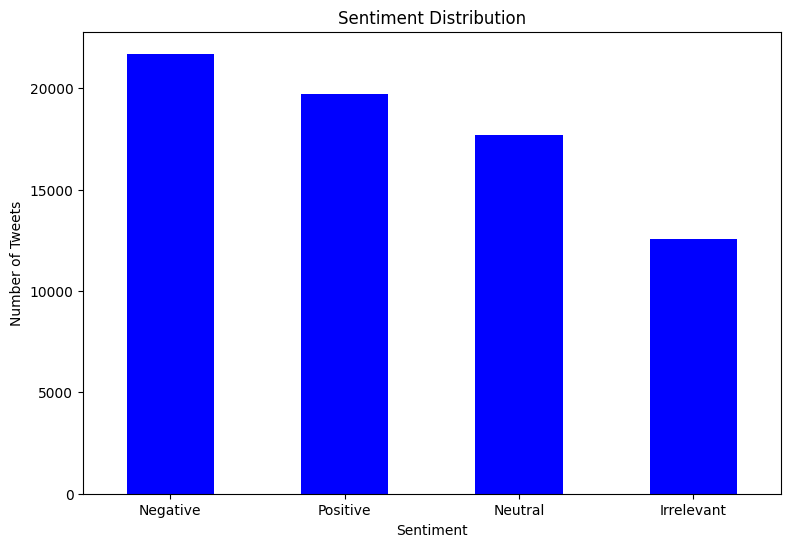

In [59]:
plt.figure(figsize=(9, 6))
sentiment_counts.plot(kind='bar', color=['blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

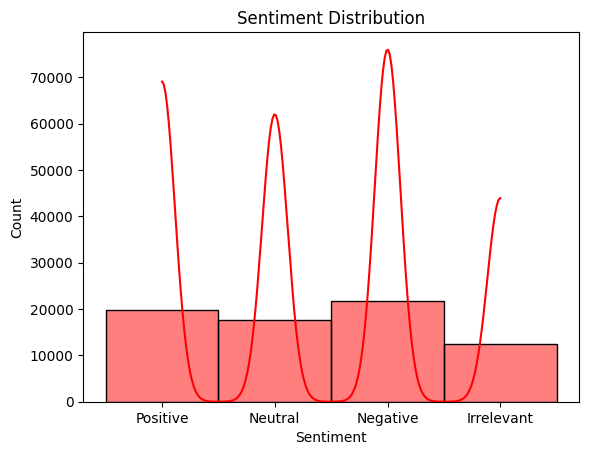

In [60]:
sb.histplot(df['Sentiment'], bins=4, kde=True, color='red', shrink=1)
plt.title('Sentiment Distribution')
plt.show()

In [37]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiment, dtype: int64

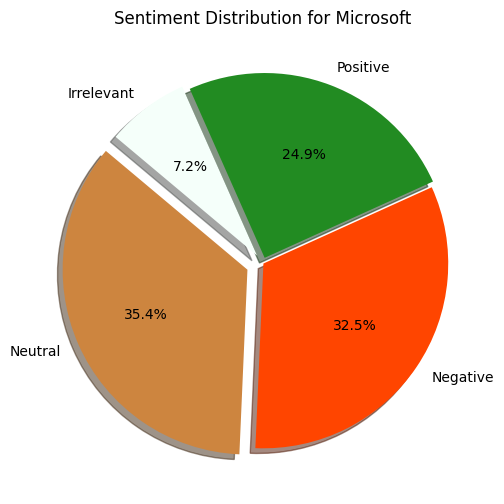

In [77]:
plt.figure(figsize=(6, 6))
explode= [0.09,0.005,0.03,0.05]
colors = ['peru','orangered','forestgreen','mintcream']
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True, colors=colors, explode=explode)
plt.title('Sentiment Distribution for Microsoft')
plt.show()